In [1]:
# Alex W
# 1003474

# 2a
# theta = [1.78157138, 3.2447227 ]
# error = 0.5812605752543938

# 2b
# batch
# theta = [0.27032973, 0.24127422]
# error = 11.18724893007848

# stochastic
# theta = [0.00195595, 0.00139545]
# error = 13.768796624516277

# 2c
# error = 0.570084436469135
# on order 15

#%%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_X = pd.read_csv("HW1_data/2/hw1x.dat", header=None, dtype=np.float64)
train_X_with_offset = pd.read_csv("HW1_data/2/hw1x.dat",
                                  header=None,
                                  dtype=np.float64)
train_X_with_offset.insert(1, 'offset', np.ones(len(train_X)))
train_Y = pd.read_csv("HW1_data/2/hw1y.dat", header=None, dtype=np.float64)

train_X.head()



,0
0,0.01
1,0.02
2,0.03
3,0.04
4,0.05


In [3]:
def get_theta_closed_form(X, Y):
    n = len(X)
    A = 1 / n * X.T @ X
    b = 1 / n * X.T @ Y

    # theta = np.mat(A).I @ b
    theta = np.linalg.pinv(A) @ b

    return theta.T[0]


def create_poly_features(X, degree):
    x1 = X.iloc[:, :1]

    for i in range(2, degree + 1):
        name = f'x^{i}'
        X.insert(X.shape[1], name, np.power(x1, i))

    return X


def plot_scatter_label_and_line(x, y, theta, xlabel, ylabel):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} vs {xlabel}')
    plt.grid(True)

    x = np.linspace(0, 2, 100)
    x_with_offset = pd.DataFrame(x)
    x_with_offset.insert(1, 'offset', np.ones(len(x)))

    print(theta.shape[0])
    x_with_offset = create_poly_features(x_with_offset, theta.shape[0] - 1)

    print(x_with_offset.values.shape)
    y = np.mat(x_with_offset.values) * np.mat(theta).T
    plt.plot(x, y, 'r')


def calculate_least_squared_error(X, Y, theta):
    X = np.mat(X)
    Y = np.mat(Y)
    theta = np.mat(theta).T
    predicted_y = X @ theta
    error = predicted_y - Y
    squared_error = np.power(error, 2)
    sum_squared_error = np.sum(squared_error)
    squared_error = sum_squared_error / (2 * X.shape[0])

    return squared_error


def gradient_descent(X, y, theta, alpha, iters):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta).T
    for _ in range(iters):
        # error = (X * theta) - y
        # gradient = X.T * error # transpose X features, to solve for matrix vector product, X is 100 * n, error is 100*1
        # increment = alpha / X.shape[0] * gradient
        # theta = theta-increment
        theta = theta + alpha / X.shape[0] * (X.T * (y - (X * theta)))
    return np.array(theta.T)[0]



[1.78157138 3.2447227 ]
2
(100, 2)
0.5812605752543938


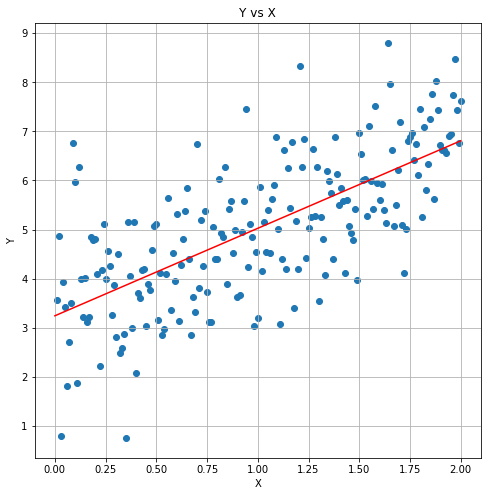

In [4]:
theta = get_theta_closed_form(train_X_with_offset.values, train_Y.values)
print(theta)
plot_scatter_label_and_line(train_X, train_Y, theta, "X", "Y")



training_error = calculate_least_squared_error(train_X_with_offset.values,
                                               train_Y.values, theta)
print(training_error)


In [5]:

alpha = 0.01
iters = 5
theta = np.zeros(train_X_with_offset.shape[1])

# perform gradient descent
theta = gradient_descent(train_X_with_offset.values, train_Y.values, theta,
                         alpha, iters)
print(theta)

training_error = calculate_least_squared_error(train_X_with_offset.values,
                                               train_Y.values, theta)
print(training_error)


[0.27032973 0.24127422]
11.18724893007848


In [6]:
import random
random.seed(9)


def stochastic_gradient_descent(X, y, theta, alpha, iters):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta).T
    for _ in range(iters):
        # error = (X * theta) - y
        # gradient = X.T * error # transpose X features, to solve for matrix vector product, X is 100 * n, error is 100*1
        # increment = alpha / X.shape[0] * gradient
        # theta = theta-increment
        t = random.randrange(X.shape[0])
        theta = theta + alpha / X.shape[0] * (X[t].T * (y[t] - (X[t] * theta)))
    return np.array(theta.T)[0]



In [7]:

alpha = 0.01
iters = 5
theta = np.zeros(train_X_with_offset.shape[1])

# perform gradient descent
theta = stochastic_gradient_descent(train_X_with_offset.values, train_Y.values,
                                    theta, alpha, iters)
print(theta)

training_error = calculate_least_squared_error(train_X_with_offset.values,
                                               train_Y.values, theta)
print(training_error)


[0.00118654 0.00120936]
13.774080870509328


[1.11846512 3.52394943 0.08090267 0.13787504]
4
(100, 4)


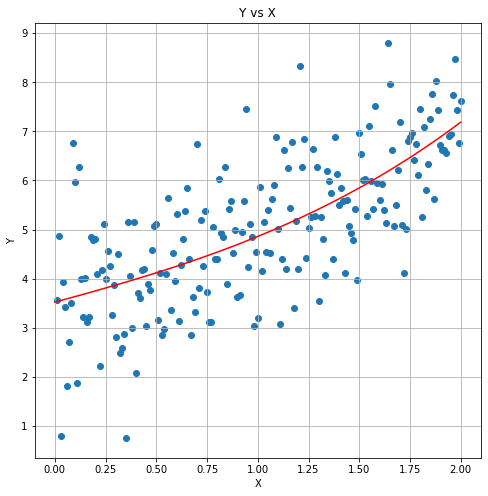

In [8]:

train_X_with_offset_degree_3 = create_poly_features(
    train_X_with_offset.copy(deep=True), 3)

theta = get_theta_closed_form(train_X_with_offset_degree_3.values,
                              train_Y.values)
print(theta)

plot_scatter_label_and_line(train_X, train_Y, theta, "X", "Y")


In [9]:
training_error = calculate_least_squared_error(
    train_X_with_offset_degree_3.values, train_Y.values, theta)
print(training_error)


0.570084436469135


In [10]:
for degree in range(3, 15 + 1):
    train_X_with_offset_degree_n = create_poly_features(
        train_X_with_offset.copy(deep=True), degree)

    theta = get_theta_closed_form(train_X_with_offset_degree_n.values,
                                  train_Y.values)

    training_error = calculate_least_squared_error(
        train_X_with_offset_degree_n.values, train_Y.values, theta)
    print(degree, training_error)


3 0.570084436469135
4 0.5646163879286425
5 0.5638968184749198
6 0.5613433038902946
7 0.5562352515818826
8 0.5537805799126986
9 0.5529231087563535
10 0.5526261842666206
11 0.5534280631688082
12 0.5511203962978343
13 0.5498826114427822
14 0.5497941299008209
15 0.5513486786377605
